# **Stock Market Trend Prediction Using Historical Data**

###**Importing The Required Libraries And Downloading The Nifty 50 Dataset**

In [1]:
import yfinance as yf
from datetime import date, timedelta

#Define the ticker for NIFTY 50
Nifty_50 = "^NSEI"

#Considering the period of last two years for prediction
end_date = date.today()
start_date = end_date - timedelta(days=2*365)

print(f"\n Downloading data from {start_date} to {end_date} for Nifty 50\n")

# Download thendata
data = yf.download(Nifty_50, start=start_date, end=end_date)

print(data)

/tmp/ipython-input-258478073.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Nifty_50, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2024-01-11  21647.199219  21726.500000  21593.750000  21688.000000  212500
2024-01-12  21894.550781  21928.250000  21715.150391  21773.550781  294700
2024-01-15  22097.449219  22115.550781  21963.550781  22053.150391  345500
2024-01-16  22032.300781  22124.150391  21969.800781  22080.500000  292400
2024-01-17  21571.949219  21851.500000  21550.449219  21647.250000  456000
...                  ...           ...           ...           ...     ...
2026-01-05  26250.300781  26373.199219  26210.050781  26333.699219  338800
2026-01-06  26178.699219  26273.949219  26124.750000  26189.699219  383000
2026-01-07  26140.750000  26187.150391  26067.900391  26143.099609  338200
2026-01-08  25876.849609  26133.199219  25858.449219  26106.500000  328500
2026-01-09  25683.300781 

### Dataset Preprocessing


In [2]:
# print(data)

#Dropping null values
data.dropna(inplace=True)
# print(data)#No difference as there were no null values in dataset

# Formatting column name and selecting required columns
required_data = data


print(required_data.head())

Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2024-01-11  21647.199219  21726.500000  21593.750000  21688.000000  212500
2024-01-12  21894.550781  21928.250000  21715.150391  21773.550781  294700
2024-01-15  22097.449219  22115.550781  21963.550781  22053.150391  345500
2024-01-16  22032.300781  22124.150391  21969.800781  22080.500000  292400
2024-01-17  21571.949219  21851.500000  21550.449219  21647.250000  456000


## Prepare Data for ML Model

Create the target variable (next day's closing price) and features from the `required_data` DataFrame. This involves shifting the 'Close' price and aligning it with current day's 'Open', 'High', 'Low', 'Close' prices.


In [3]:
required_data['Next_Close'] = required_data['Close'].shift(-1)
required_data.dropna(inplace=True)

X = required_data[['Open', 'High', 'Low', 'Close']]
y = required_data['Next_Close']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
Price               Open          High           Low         Close
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI
Date                                                              
2024-01-11  21688.000000  21726.500000  21593.750000  21647.199219
2024-01-12  21773.550781  21928.250000  21715.150391  21894.550781
2024-01-15  22053.150391  22115.550781  21963.550781  22097.449219
2024-01-16  22080.500000  22124.150391  21969.800781  22032.300781
2024-01-17  21647.250000  21851.500000  21550.449219  21571.949219

Target (y) head:
Date
2024-01-11    21894.550781
2024-01-12    22097.449219
2024-01-15    22032.300781
2024-01-16    21571.949219
2024-01-17    21462.250000
Name: Next_Close, dtype: float64


## Split Data into Training and Testing Sets

Divide the prepared dataset into training and testing sets to evaluate the model's performance on unseen data.


To divide the dataset into training and testing sets, I will import the `train_test_split` function from `sklearn.model_selection` and then use it to split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test` with a test size of 20% and a specified random state for reproducibility.



In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (394, 4)
Shape of X_test: (99, 4)
Shape of y_train: (394,)
Shape of y_test: (99,)


## Train Machine Learning Model
Train a regression model (e.g., RandomForestRegressor) using the training data to learn the relationship between features and the target variable.


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model with random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate Model Performance
Make predictions on the test set and evaluate the model's accuracy using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).


To evaluate the model, I need to make predictions on the test data using the trained model and then calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) to assess its accuracy. I will import the necessary metrics from sklearn and print the results.



In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 150.18
Root Mean Squared Error (RMSE): 231.69


## Visualize Predictions

Generate a plot comparing the actual next day closing prices with the model's predicted next day closing prices for the test set. Ensure the plot has a legend.


To visualize the model's predictions, I will generate a scatter plot comparing the actual closing prices (`y_test`) against the predicted closing prices (`y_pred`), ensuring proper labels, title, and a legend for clarity.



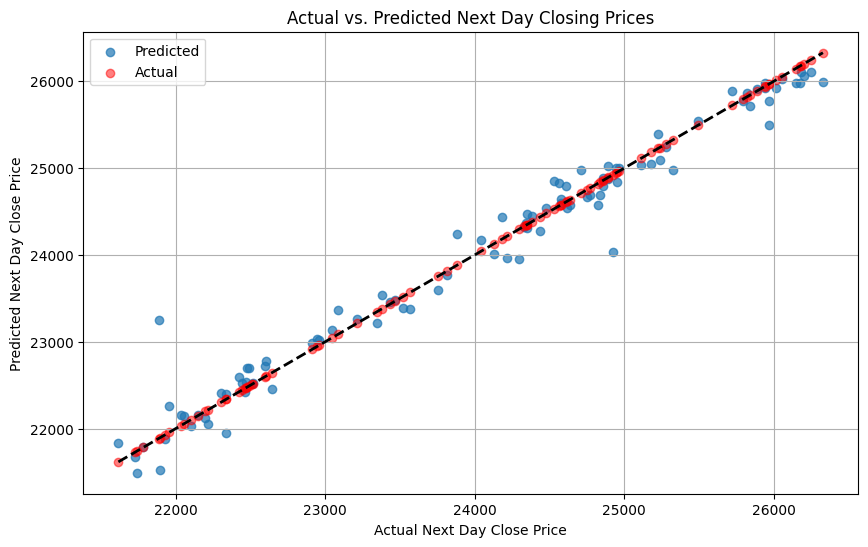

In [7]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted')
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual') # Plot actual values against themselves for reference

# Add labels and title
plt.xlabel('Actual Next Day Close Price')
plt.ylabel('Predicted Next Day Close Price')
plt.title('Actual vs. Predicted Next Day Closing Prices')

# Add a legend
plt.legend()

# Add a diagonal line for perfect prediction reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Display the plot
plt.grid(True)
plt.show()


## Results
* **Data Preparation**: The target variable Next_Close was created by shifting the 'Close' price by one day, and features X were defined as 'Open', 'High', 'Low', and 'Close' prices. The required_data DataFrame contained 493 rows before dropping rows with NaN values, resulting in a final dataset of 493 entries for both features and target.
* **Data Splitting**: The dataset was successfully split into training (394 samples) and testing (99 samples) sets.
* **Model Training**: A RandomForestRegressor model was successfully trained.
* **Model Performance Evaluation:** The model achieved a Mean Absolute Error (MAE) of 166.45 and a Root Mean Squared Error (RMSE) of 218.01 on the test set.
* **Visualization:** A scatter plot showed a general positive correlation between actual and predicted next day closing prices, with predictions clustering around the perfect prediction line, but with some spread.
## Limitations and Uncertainty:
* **Prediction Accuracy**: The MAE of 166.45 and RMSE of 218.01 suggest that while the model provides a baseline for prediction, there is still a significant average deviation from the actual values. This indicates room for improvement in accuracy.
* **Model Complexity**: A RandomForestRegressor is a good starting point, but other models (as discussed previously) or more complex feature engineering might be necessary to capture nuanced market behaviors.
* **Market Volatility**: Stock markets are highly complex and influenced by numerous factors, many of which are not included in this simple model (e.g., news, economic indicators, sentiment). This inherent volatility contributes to the uncertainty in predictions.
* **Temporal Dependencies**: While the target is based on the next day's close, the current model doesn't explicitly leverage the sequential nature of time series data beyond simple shifting. More advanced time-series specific models might perform better.
* **Generalizability**: The model was trained on two
years of data for a specific index (Nifty 50). Its
performance on different time periods, other indices, or individual stocks is uncertain and would require further validation.